# testing

In [7]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    port=5433,
    user="ubuntu",
    dbname="brti"
)
cur = conn.cursor()

# Fetch the latest row by timestamp
cur.execute("SELECT * FROM brti_prices ORDER BY timestamp DESC LIMIT 1;")
row = cur.fetchone()
print(row)

cur.close()
conn.close()

(39874, Decimal('105524.54'), datetime.datetime(2025, 6, 15, 13, 24, 35, 18709, tzinfo=datetime.timezone.utc))


# download all the data and put into a df

In [8]:
import psycopg2
import pandas as pd
from zoneinfo import ZoneInfo

# DB connection parameters
DB_HOST = "localhost"
DB_PORT = 5433
DB_NAME = "brti"
DB_USER = "ubuntu"

# Connect and load data into DataFrame
with psycopg2.connect(
    host=DB_HOST,
    port=DB_PORT,
    dbname=DB_NAME,
    user=DB_USER
) as conn:
    df = pd.read_sql_query("""
        SELECT id, price, timestamp 
        FROM brti_prices 
        ORDER BY timestamp ASC;
    """, conn)

# Convert timestamps to US/Eastern timezone
df['timestamp'] = df['timestamp'].dt.tz_convert(ZoneInfo("US/Eastern"))

# Preview
df.tail()

C:\Users\chris\AppData\Local\Temp\ipykernel_34484\1473371053.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


,id,price,timestamp
39501,39872,105520.92,2025-06-15 09:24:31.905438-04:00
39502,39873,105519.78,2025-06-15 09:24:33.427198-04:00
39503,39874,105524.54,2025-06-15 09:24:35.018709-04:00
39504,39875,105532.37,2025-06-15 09:24:36.548377-04:00
39505,39876,105535.83,2025-06-15 09:24:38.140207-04:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39506 entries, 0 to 39505
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype                     
---  ------     --------------  -----                     
 0   id         39506 non-null  int64                     
 1   price      39506 non-null  float64                   
 2   timestamp  39506 non-null  datetime64[ns, US/Eastern]
dtypes: datetime64[ns, US/Eastern](1), float64(1), int64(1)
memory usage: 926.1 KB


# visualize

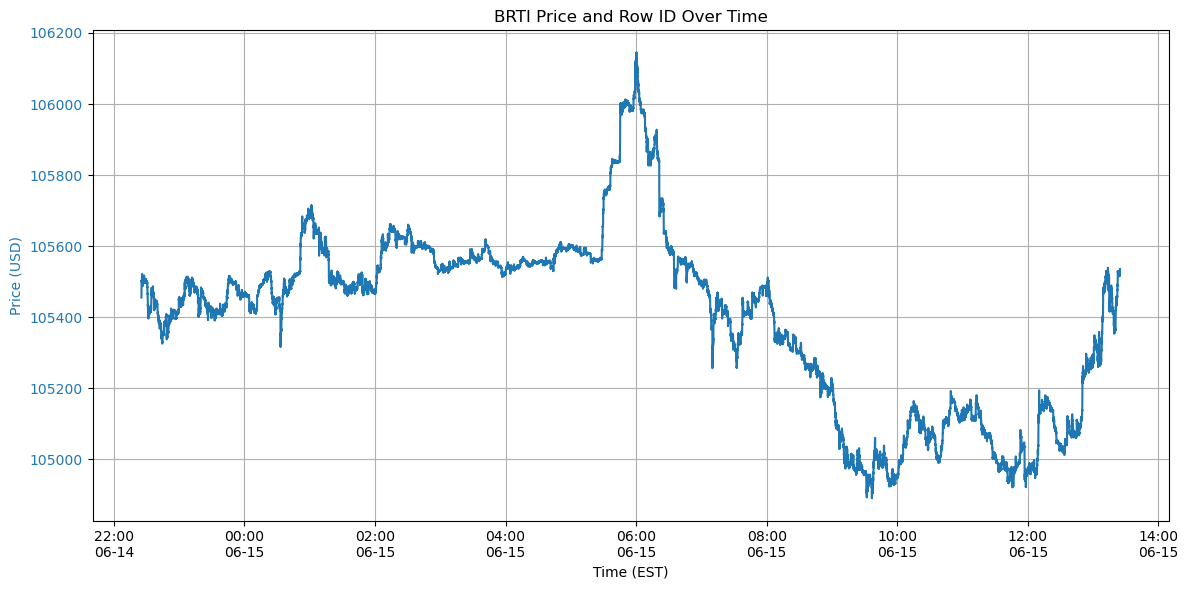

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

timestamps_utc = df['timestamp']
prices = df['price']
ids = df['id']

# Convert timestamps to EST
timestamps_est = [ts.astimezone(ZoneInfo("US/Eastern")) for ts in timestamps_utc]

# === PLOT ===
fig, ax1 = plt.subplots(figsize=(12, 6))

# Price (primary y-axis)
ax1.plot(timestamps_est, prices, label="Price (USD)", color="tab:blue")
ax1.set_xlabel("Time (EST)")
ax1.set_ylabel("Price (USD)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d'))

# Title and layout
plt.title("BRTI Price and Row ID Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()